In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/output/val/normal/DALLíñE 2023-03-10 23.42.04 - photo of a part of car without blemish.png
/kaggle/input/output/val/normal/DALLíñE 2023-03-10 23.34.47 - photo of a part of car without blemish.png
/kaggle/input/output/val/normal/DALLíñE 2023-03-11 00.57.59 - photo of a part of car.png
/kaggle/input/output/val/normal/DALLíñE 2023-03-11 14.41.37 - photo of part of a car.png
/kaggle/input/output/val/normal/DALLíñE 2023-03-11 01.16.06 - a part of a car.png
/kaggle/input/output/val/normal/DALLíñE 2023-03-11 14.43.32 - photo of part of a car.png
/kaggle/input/output/val/normal/DALLíñE 2023-03-11 17.09.48 - a part of a car.png
/kaggle/input/output/val/normal/DALLíñE 2023-03-11 00.05.30 - a part of car without blemish.png
/kaggle/input/output/val/normal/DALLíñE 2023-03-11 01.04.23 - photo of a part of car.png
/kaggle/input/output/val/normal/DALLíñE 2023-03-10 23.32.22 - photo of a part of car without blemish.png
/kaggle/input/output/val/normal/DALLíñE 2023-03-11 14.24.16 - part of

In [2]:
# 절대경로
path = []
# train, val, test data
dataset_gubuns = []
# abnormal or normal 구분
labels_gubuns = []

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if '.png' in filename:
            file_path = dirname + '/' + filename
            path.append(file_path)
        if '/train/' in file_path:
            dataset_gubuns.append('train')
        elif '/val/' in file_path:
            dataset_gubuns.append('val')
        else:
            dataset_gubuns.append('test')
        
        if '/abnormal/' in file_path:
            labels_gubuns.append('abnormal')
        elif '/normal/' in file_path:
            labels_gubuns.append('normal')

In [3]:
pd.set_option('display.max_colwidth', 200)
df = pd.DataFrame({
    'path': path,
    'dataset': dataset_gubuns,
    'label': labels_gubuns
})
print('df shape: ', df.shape)
df.head(10)

df shape:  (605, 3)


,path,dataset,label
0,/kaggle/input/output/val/normal/DALLíñE 2023-03-10 23.42.04 - photo of a part of car without blemish.png,val,normal
1,/kaggle/input/output/val/normal/DALLíñE 2023-03-10 23.34.47 - photo of a part of car without blemish.png,val,normal
2,/kaggle/input/output/val/normal/DALLíñE 2023-03-11 00.57.59 - photo of a part of car.png,val,normal
3,/kaggle/input/output/val/normal/DALLíñE 2023-03-11 14.41.37 - photo of part of a car.png,val,normal
4,/kaggle/input/output/val/normal/DALLíñE 2023-03-11 01.16.06 - a part of a car.png,val,normal
5,/kaggle/input/output/val/normal/DALLíñE 2023-03-11 14.43.32 - photo of part of a car.png,val,normal
6,/kaggle/input/output/val/normal/DALLíñE 2023-03-11 17.09.48 - a part of a car.png,val,normal
7,/kaggle/input/output/val/normal/DALLíñE 2023-03-11 00.05.30 - a part of car without blemish.png,val,normal
8,/kaggle/input/output/val/normal/DALLíñE 2023-03-11 01.04.23 - photo of a part of car.png,val,normal
9,/kaggle/input/output/val/normal/DALLíñE 2023-03-10 23.32.22 - photo of a part of car without blemish.png,val,normal


In [4]:
train_df = df[df['dataset'] == 'train']
test_df = df[df['dataset'] == 'test']
val_df = df[df['dataset'] == 'val']

print('train_df shape: ', train_df.shape)
print('val_df shape: ', val_df.shape)
print('test_df shape: ', test_df.shape)

train_df shape:  (362, 3)
val_df shape:  (120, 3)
test_df shape:  (123, 3)


In [5]:
print('train_df label distribution:\n', train_df['label'].value_counts())
print('val_df label distribution: \n', val_df['label'].value_counts())
print('test_df label distribution: \n', test_df['label'].value_counts())

train_df label distribution:
 normal      181
abnormal    181
Name: label, dtype: int64
val_df label distribution: 
 normal      60
abnormal    60
Name: label, dtype: int64
test_df label distribution: 
 abnormal    62
normal      61
Name: label, dtype: int64


In [14]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.backend import clear_session
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import VGG16, ResNet50V2, Xception, InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
IMAGE_SIZE = 512
BATCH_SIZE = 32

tr_generator = ImageDataGenerator(
    rotation_range=180,
    vertical_flip=True,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    rescale=1/255.
)

tr_flow_gen = tr_generator.flow_from_dataframe(
    dataframe = train_df,
    x_col = 'path',
    y_col = 'label',
    target_size = (512, 512),
    class_mode = 'binary',
    batch_size = BATCH_SIZE,
    shuffle=True
)

Found 362 validated image filenames belonging to 2 classes.


In [27]:
images_array = next(tr_flow_gen)[0]
labels_array = next(tr_flow_gen)[1]

print('##### image array shape:', images_array.shape)
print('#### label array shape:', labels_array.shape)
print(images_array[0])
print(labels_array[0])

##### image array shape: (32, 512, 512, 3)
#### label array shape: (32,)
[[[0.8117279  0.8276091  0.8325327 ]
  [0.81625795 0.82872826 0.8303592 ]
  [0.80686235 0.8197828  0.8260726 ]
  ...
  [0.49157736 0.44821793 0.38017002]
  [0.49974382 0.46052814 0.395771  ]
  [0.5110827  0.4693095  0.4040069 ]]

 [[0.8130944  0.82502544 0.8309859 ]
  [0.8155353  0.8313545  0.83043677]
  [0.8031695  0.81686956 0.81081545]
  ...
  [0.49519557 0.45597988 0.39031312]
  [0.510173   0.47021914 0.4067358 ]
  [0.51346385 0.46692836 0.39686346]]

 [[0.8084067  0.8185162  0.82772124]
  [0.8073397  0.81700206 0.8322836 ]
  [0.80473584 0.81466824 0.8229859 ]
  ...
  [0.50710124 0.46788558 0.40459993]
  [0.51255417 0.467838   0.3995924 ]
  [0.5137255  0.46878618 0.39819792]]

 ...

 [[0.29576525 0.29701805 0.24808   ]
  [0.29083124 0.29703116 0.24478048]
  [0.2893118  0.28817126 0.2500961 ]
  ...
  [0.37322238 0.34543473 0.2826896 ]
  [0.38467047 0.35202459 0.2944744 ]
  [0.39914855 0.3602978  0.30895248]]

 

In [17]:
val_generator = ImageDataGenerator(
    rescale = 1/255.)

val_flow_gen = val_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col = 'path',
    y_col = 'label',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    class_mode = 'binary',
    batch_size = BATCH_SIZE,
    shuffle=True
)

Found 120 validated image filenames belonging to 2 classes.


In [28]:
def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        base_model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50':
        base_model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'InceptionV3':
        base_model = InceptionV3(input_tensor=input_tensor, include_top=False, weights='imagenet')
    
    bm_output = base_model.output

    x = GlobalAveragePooling2D()(bm_output)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    
    x = Dense(64, activation='relu', name='fc2')(x)
    x = Dropout(rate=0.5)(x)
    

    # 최종 output 출력을 softmax에서 sigmoid로 변환. 
    output = Dense(1, activation='sigmoid', name='output')(x)

    # output의 값이 0.5 ~ 1일 때는 1으로 예측
    # output의 값이 0.5 미만인 경우는 0으로 예측

    

    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
        
    return model

In [29]:
model = create_model(model_name='InceptionV3', verbose=True)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 255, 255, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 255, 255, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

In [30]:
print(f'모델의 레이어수: {len(model.layers)}')

모델의 레이어수: 316


In [31]:
for idx, layer in enumerate(model.layers):
    if idx < 216:
        layer.trainable = False
    else:
        layer.trainable=True
    

In [32]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'],
             optimizer=Adam(0.001))

In [33]:
lr_reduction = ReduceLROnPlateau(monitor='val_loss',
                                patience=4,
                                verbose=1,
                                factor=0.2,
                                min_lr = 0.000001)
es = EarlyStopping(monitor='val_loss',
                  min_delta = 0,
                  patience=5,
                  verbose=1,
                  restore_best_weights=True)

In [34]:
hist = model.fit(tr_flow_gen, epochs=1000, validation_data = val_flow_gen,
                verbose=1, callbacks=[es, lr_reduction])

Epoch 1/1000
12/12 [==============================] - 86s 5s/step - loss: 0.2824 - accuracy: 0.8785 - val_loss: 0.8776 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 2/1000
12/12 [==============================] - 41s 3s/step - loss: 0.1497 - accuracy: 0.9530 - val_loss: 1.2078 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 3/1000
12/12 [==============================] - 42s 3s/step - loss: 0.0831 - accuracy: 0.9751 - val_loss: 0.8988 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 4/1000
12/12 [==============================] - 42s 3s/step - loss: 0.1156 - accuracy: 0.9751 - val_loss: 0.5313 - val_accuracy: 0.9167 - lr: 0.0010
Epoch 5/1000
12/12 [==============================] - 41s 3s/step - loss: 0.0695 - accuracy: 0.9834 - val_loss: 2.9065 - val_accuracy: 0.8583 - lr: 0.0010
Epoch 6/1000
12/12 [==============================] - 41s 3s/step - loss: 0.0298 - accuracy: 0.9917 - val_loss: 1.2325 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 7/1000
12/12 [==============================] - 42s 4s/step - lo

In [36]:
test_generator = ImageDataGenerator(rescale=1/255.)
test_flow_gen = test_generator.flow_from_dataframe(dataframe=test_df
                                      ,x_col='path'
                                      ,y_col='label'
                                      ,target_size=(IMAGE_SIZE, IMAGE_SIZE) 
                                      ,class_mode='binary' 
                                      ,batch_size=BATCH_SIZE
                                      ,shuffle=False
                                      )

performace_test = model.evaluate(test_flow_gen)

Found 123 validated image filenames belonging to 2 classes.
4/4 [==============================] - 6s 1s/step - loss: 0.0757 - accuracy: 0.9837


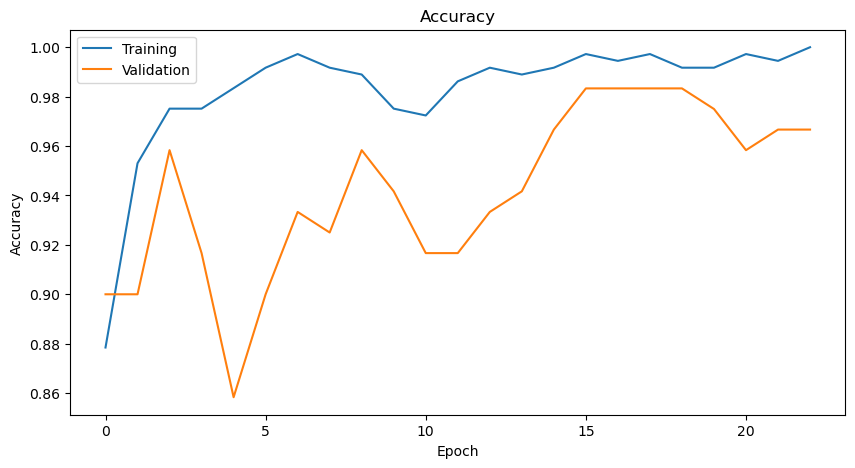

In [38]:
import matplotlib.pyplot as plt
if not isinstance(hist, dict):
    history = hist.history
plt.figure(figsize=(10, 5))
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()